# Electronic Sales Data Analysis at Amazon

##  Exploratory Data Analysis [EDA]

In [1]:
#Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#importing the dataset
dataset = pd.read_csv(r"C:\Users\Administrator\Desktop\Anudip Foundation\Projects\Sprint 1\cleaned.csv")

In [2]:
#List first 5 rows

dataset.head()

,item_id,user_id,rating,timestamp,gender,category,brand,year,month,quantity,unitprice,amount
0,7,131,4,6/15/2000,Female,Home Audio,Philips,2000,6,5,6360,31800
1,19,231,5,12/31/2000,Female,Camera,Canon,2000,12,10,9955,99550
2,14,233,5,1/2/2001,Female,Camera,Kodak,2001,1,9,7639,68751
3,14,257,5,2/4/2001,Female,Camera,Kodak,2001,2,7,5097,35679
4,14,269,5,3/2/2001,Female,Camera,Kodak,2001,3,10,6472,64720


In [3]:
#List last 5 rows

dataset.tail()

,item_id,user_id,rating,timestamp,gender,category,brand,year,month,quantity,unitprice,amount
45161,7828,1157458,5,8/29/2018,Female,Headphones,Bose,2018,8,7,5925,41475
45162,8624,1157504,5,8/30/2018,Female,Headphones,Pyle,2018,8,7,9717,68019
45163,9513,1157527,5,9/1/2018,Male,Headphones,Mpow,2018,9,8,9197,73576
45164,9125,1157555,3,9/5/2018,Female,Headphones,EldHus,2018,9,10,8848,88480
45165,9478,1157632,1,10/1/2018,Female,Headphones,Etre Jeune,2018,10,7,7717,54019


In [4]:
#To know the number of rows and columns in the data

dataset.shape

(45166, 12)

**Inference:**  Dataset comprises 45166 Rows and 12 columns.

In [5]:
#Columns and their datatypes and to also check whether they have any null values or not.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45166 entries, 0 to 45165
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   item_id    45166 non-null  int64 
 1   user_id    45166 non-null  int64 
 2   rating     45166 non-null  int64 
 3   timestamp  45166 non-null  object
 4   gender     45166 non-null  object
 5   category   45166 non-null  object
 6   brand      45166 non-null  object
 7   year       45166 non-null  int64 
 8   month      45166 non-null  int64 
 9   quantity   45166 non-null  int64 
 10  unitprice  45166 non-null  int64 
 11  amount     45166 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.1+ MB


**Inference:**
No Variable column has null/missing values. <br> We can see that the dataset contains 12 columns and 45166 rows

In [6]:
#Using the describe function to see the statistical summary of the rating column present in the dataset

dataset['rating'].describe()

count    45166.000000
mean         4.218594
std          1.221118
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

**Inference:**
The statistical summary of the dataset gives us the following information:
 1. The mean rating is 4.2
 2. The minimum rating is 1
 3. The maximum rating is 5.
 4. The standard deviation of the ratings is 1.22
 5. The 25th percentile of the ratings is 4.
 6. The 50th percentile of the ratings is 5.
 7. The 75th percentile of the ratings is 5

In [7]:
#To see the number of unique users and items in the dataset

dataset.nunique()

item_id       1892
user_id      40401
rating           5
timestamp     4179
gender           2
category        10
brand           50
year            19
month           12
quantity         6
unitprice     5001
amount       19611
dtype: int64

In [8]:
#Checking for any missing values if present in any column

dataset.isnull().sum()

item_id      0
user_id      0
rating       0
timestamp    0
gender       0
category     0
brand        0
year         0
month        0
quantity     0
unitprice    0
amount       0
dtype: int64

**Inference:**
There are no null values present in each of the columns in the dataset.

## Data Visualization

**1. Finding the Best Year of Sales <Br>
2. Finding The Monthly Sales Trend (No of orders per month) <Br> 
3. Finding Monthly Sales Trend (Average Amount Spent Per Month) <Br>
4. Finding Brand Popularity by Total Amount (Top 15) <Br>
5. Finding The Brands Least Sold by Total Amount (Bottom 15) <Br>
6. Finding Top and Least Categories by Quantity Sold <Br>
7. Finding Distribution of Ratings <Br>
8. Finding Category-Wise Rating Distribution <Br>
9. Finding Brand-Wise Rating Distribution <Br>
10. Finding Gender-Based Distribution <Br>
11. Finding Gender vs. Average Unit Price <Br>
12. Finding Category Wise Sales Percentage <Br>
13. Finding Brand Wise Sales Percentage <Br>
14. Finding Purchasing Pattern Over Time**

#### 1. Finding the Best Year of Sales

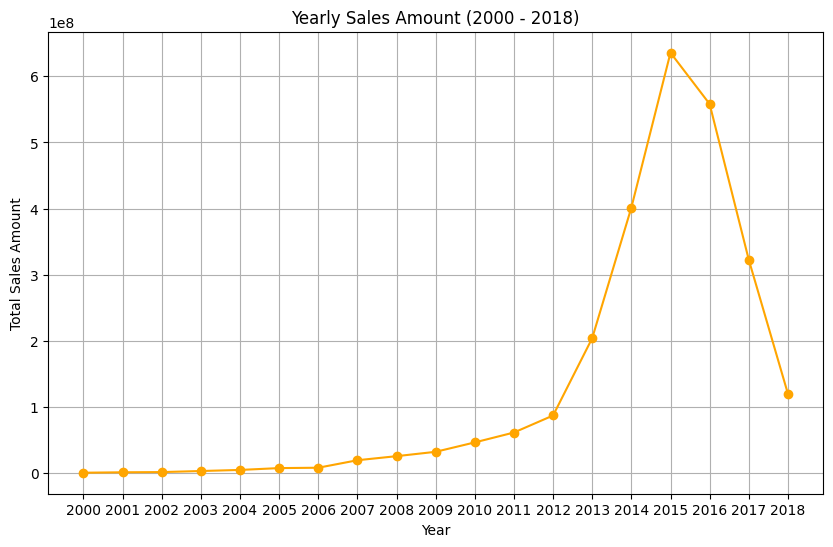

In [9]:
# Plot yearly sales amount
plt.figure(figsize=(10,6))
dataset.groupby('year')['amount'].sum().plot(kind='line', marker='o', color='orange')
plt.title('Yearly Sales Amount (2000 - 2018)')
plt.xlabel('Year')
plt.ylabel('Total Sales Amount')
unique_years = dataset['year'].unique()
plt.xticks(unique_years)
plt.grid(True)
plt.show()

**Inference:**<br>
Based on the sales graph, 2015 was the peak year for sales.<br> There was a consistent rise in sales from 2007 to 2015, followed by a slight dip in 2016.<br> However, the decline in sales became more pronounced in 2017 and 2018.

#### 2. Finding The Monthly Sales Trend (No of orders per month)

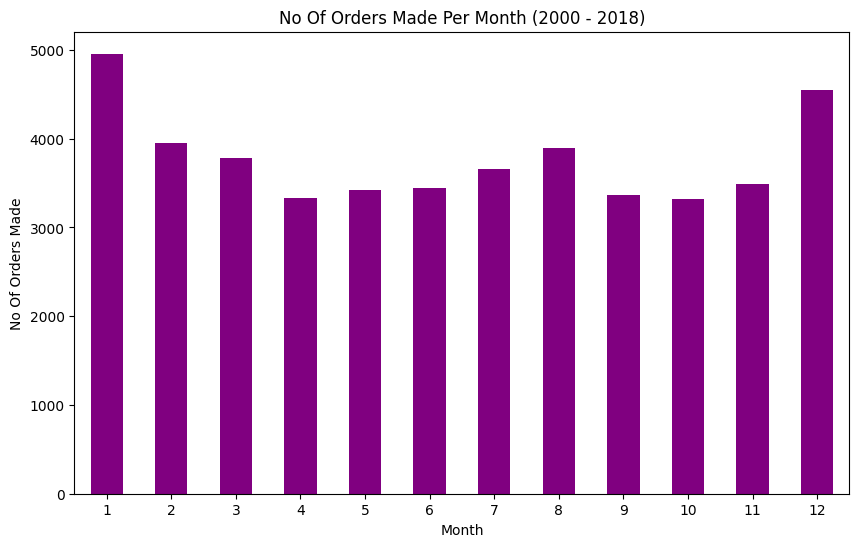

In [10]:
# Plot average monthly sales amount
plt.figure(figsize=(10,6))
dataset.groupby('month')['amount'].count().plot(kind='bar', color='purple')
plt.title('No Of Orders Made Per Month (2000 - 2018)')
plt.xlabel('Month')
plt.ylabel('No Of Orders Made')
plt.xticks(rotation=0)
plt.show()

 **Inference:** <br>
 January was the month when most no of orders were made across the product categories and
 over the years. <br> The month of December secures the 2nd spot of most orders made.

#### 3. Finding The Monthly Sales Trend (Average Amount Spent Per Month)

month
1     55905.221259
2     56795.688006
3     55911.873284
4     56374.253305
5     56485.318222
6     55688.153712
7     55585.163611
8     56139.477010
9     56322.800356
10    56226.774427
11    55930.382058
12    56126.477028
Name: amount, dtype: float64


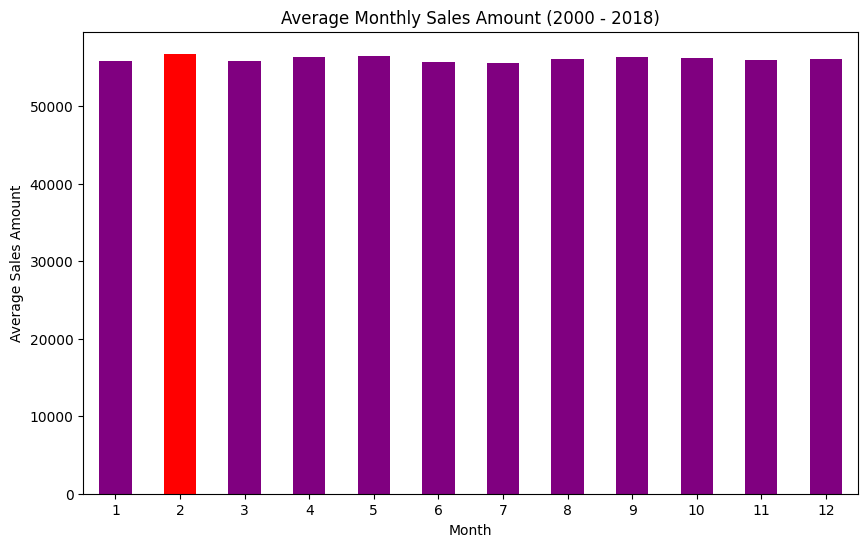

In [11]:
import matplotlib.pyplot as plt

# Plot average monthly sales amount
plt.figure(figsize=(10,6))
df_average_sales = dataset.groupby('month')['amount'].mean()
max_sales_idx = df_average_sales.idxmax() - 1
print(df_average_sales)
colors = ['purple' for _ in df_average_sales]  
colors[max_sales_idx] = 'red' 

df_average_sales.plot(kind='bar', color=colors)
plt.title('Average Monthly Sales Amount (2000 - 2018)')
plt.xlabel('Month')
plt.ylabel('Average Sales Amount')
plt.xticks(rotation=0)

plt.show()

**Inference:** <br>
The month of February has the highest average monthly sales amount of Rs 56795 from Year 2000 to 2018. <br>
Other months also have a similar number but the February records the highest monthly average sales.

#### 4. Finding Brand Popularity by Total Amount (Top 15)

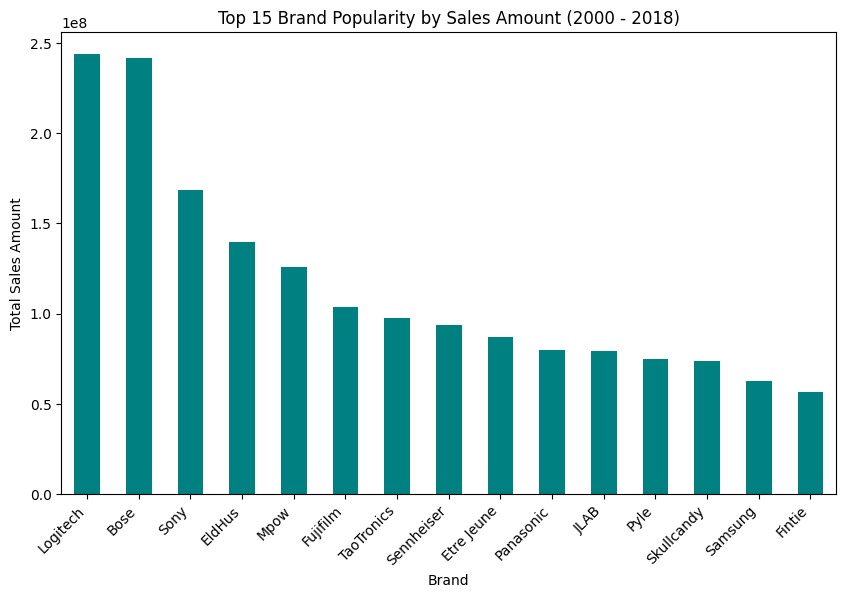

In [12]:
# Plot brand popularity by total sales amount
plt.figure(figsize=(10,6))
dataset.groupby('brand')['amount'].sum().sort_values(ascending=False).head(15).plot(kind='bar', color='teal')
plt.title('Top 15 Brand Popularity by Sales Amount (2000 - 2018)')
plt.xlabel('Brand')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45, ha='right')
plt.show()


**Inference:** <Br>
Logitech was the brand with the most sales in 2000 to 2018 followed by Bose.

#### 5. Finding The Brands Least Sold by Total Amount (Bottom 15)

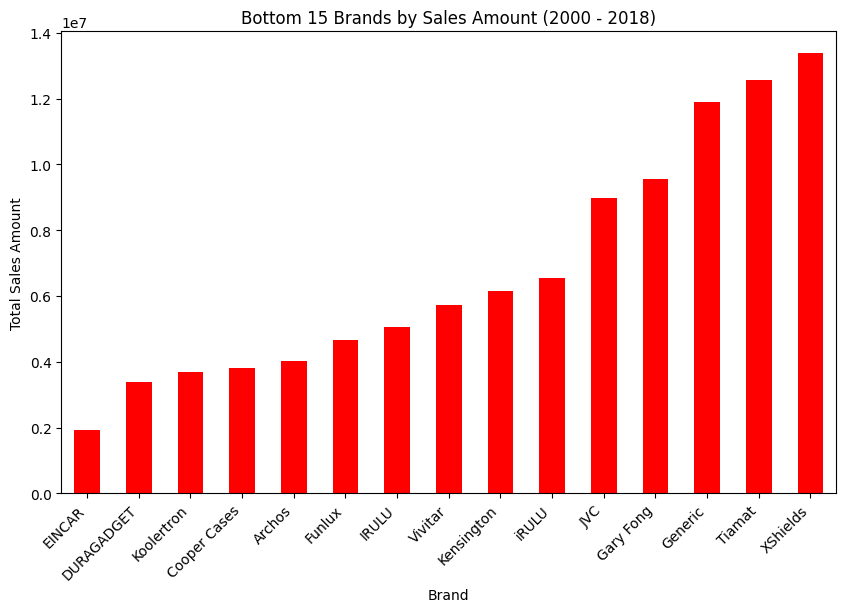

In [13]:
# Least 15 Brands Sold By Sales Amount
plt.figure(figsize=(10,6))
dataset.groupby('brand')['amount'].sum().sort_values(ascending=True).head(15).plot(kind='bar', color='Red')
plt.title('Bottom 15 Brands by Sales Amount (2000 - 2018)')
plt.xlabel('Brand')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45, ha='right')
plt.show()


**Inference:** <Br>
Eincar was the brand with the least sales in 2000 to 2018 followed by Duragadget.

#### 6. Finding Top and Least Categories by Quantity Sold

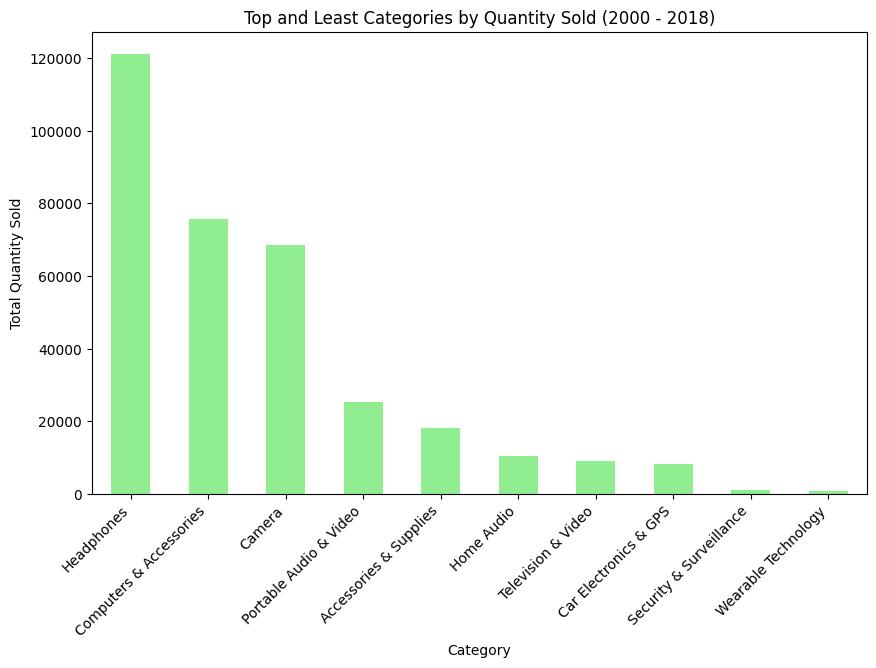

In [14]:
# Plot top categories by quantity sold
plt.figure(figsize=(10,6))
dataset.groupby('category')['quantity'].sum().sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('Top and Least Categories by Quantity Sold (2000 - 2018)')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

**Inference:** <br>
**Top Categories:** Based on sales data from 2000 to 2018, headphones were the most popular category, followed by computers and accessories, and then cameras in terms of total quantity sold. <br>
**Least Categories:**  We can see that the category of Wearable Technology sold the least followed closely by
 Security and Surveillance.

#### 7. Finding Distribution of Ratings

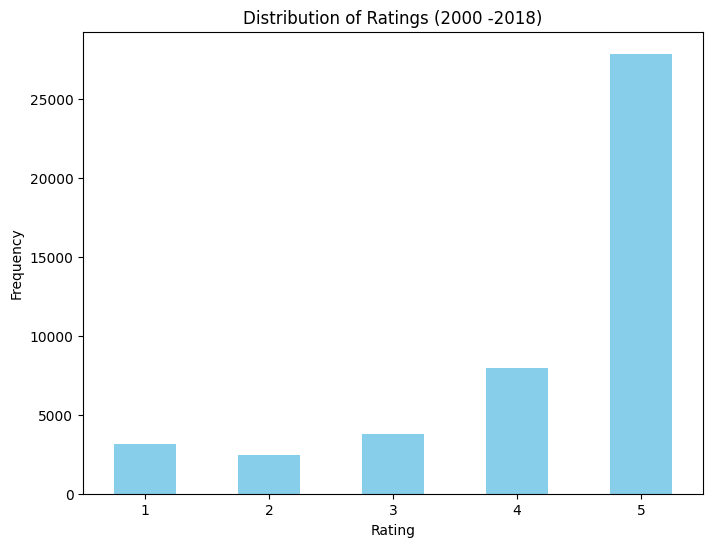

In [15]:
import matplotlib.pyplot as plt

# Plot the distribution of ratings
plt.figure(figsize=(8,6))
dataset['rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Ratings (2000 -2018)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

**Inference:** <Br> The majority of products received a 5-star rating.

#### 8. Finding Category-Wise Rating Distribution

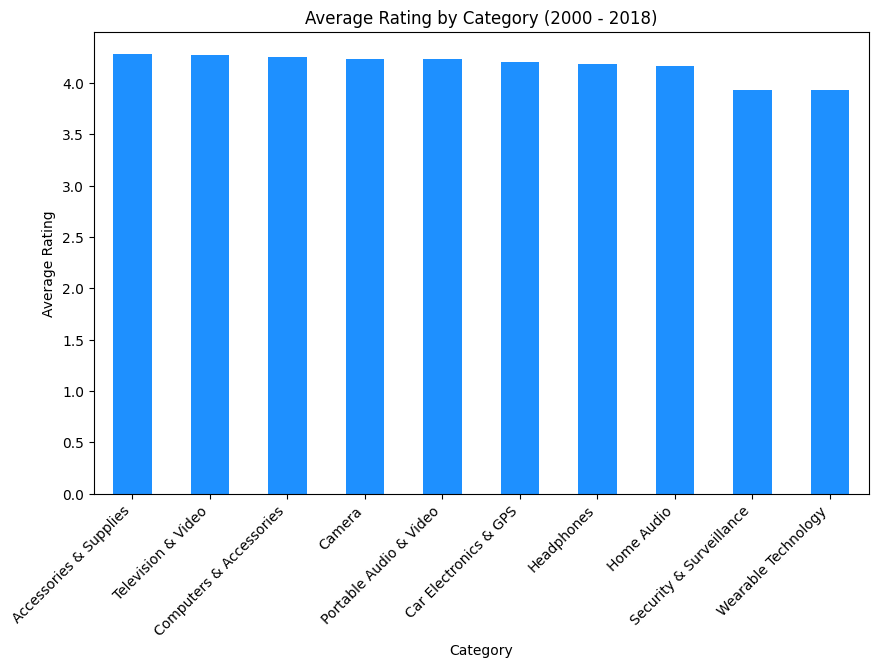

In [16]:
# Plot category-wise average rating
plt.figure(figsize=(10,6))
dataset.groupby('category')['rating'].mean().sort_values(ascending=False).plot(kind='bar', color='dodgerblue')
plt.title('Average Rating by Category (2000 - 2018)')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

**Inference:** <Br> Based on customer ratings, Accessories & Supplies and Television & Video products consistently received the highest levels of satisfaction.

#### 9. Finding Brand-Wise Rating Distribution

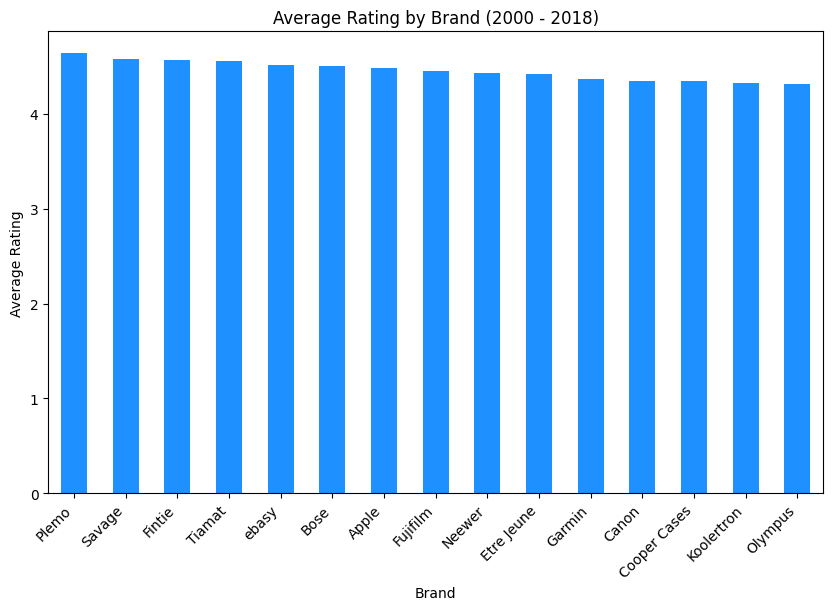

In [17]:
# Plot brand-wise average rating
plt.figure(figsize=(10,6))
dataset.groupby('brand')['rating'].mean().sort_values(ascending=False).head(15).plot(kind='bar', color='dodgerblue')
plt.title('Average Rating by Brand (2000 - 2018)')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

**Inference:** <Br> Pleme and Savage were the brands with the highest ratings.

#### 10. Finding Gender-Based Distribution

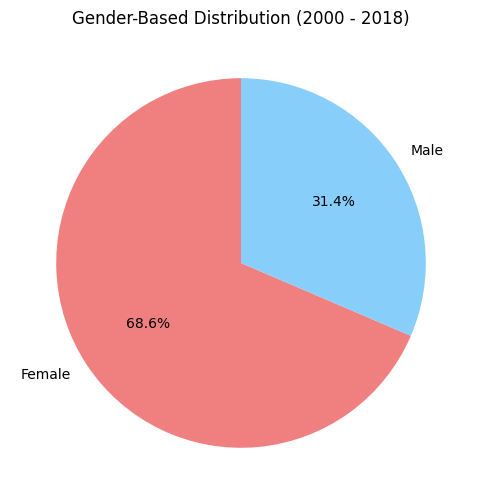

In [18]:
# Plot gender-based distribution
plt.figure(figsize=(6,6))
dataset['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], startangle=90)
plt.title('Gender-Based Distribution (2000 - 2018)')
plt.ylabel('')
plt.show()

**Inference:** <Br> Female are buying the most from Amazon with 68.6% share in the total number of orders made.

#### 11. Finding Gender vs. Average Unit Price

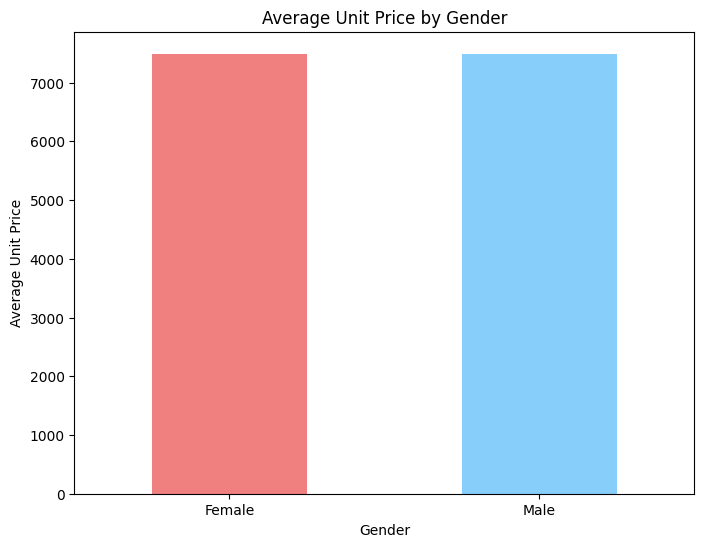

In [19]:
# Plot average unit price by gender
plt.figure(figsize=(8,6))
dataset.groupby('gender')['unitprice'].mean().plot(kind='bar', color=['lightcoral', 'lightskyblue'])
plt.title('Average Unit Price by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Unit Price')
plt.xticks(rotation=0)
plt.show()

**Inference:** <Br> The Average order value of Male and Female are almost same. <Br> Male has an average unit price of Rs 7488 and Female has an average unit price of Rs 7492.

#### 12. Finding Category Wise Sales Percentage

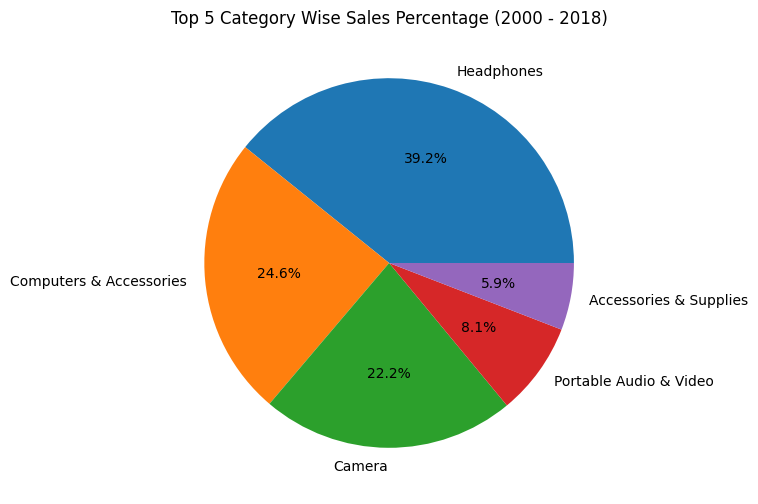

In [20]:
# Plot gender-based distribution
plt.figure(figsize=(6,6))
dataset.groupby('category')['amount'].sum().sort_values(ascending=False).head(5).plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 5 Category Wise Sales Percentage (2000 - 2018)')
plt.ylabel('')
plt.show()

**Inference:** <Br> Headphones sales percentage is the highest followed by Computers & Accessories.

#### 13. Finding Brand Wise Sales Percentage

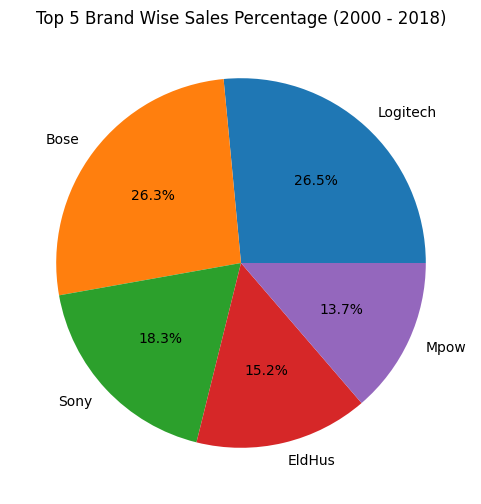

In [21]:
# Plot gender-based distribution
plt.figure(figsize=(6,6))
dataset.groupby('brand')['amount'].sum().sort_values(ascending=False).head(5).plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 5 Brand Wise Sales Percentage (2000 - 2018)')
plt.ylabel('')
plt.show()

**Inference:** <Br> Logitech and Bose sales percentage is highest followed by Sony.

#### 14. Finding Purchasing Pattern Over Time

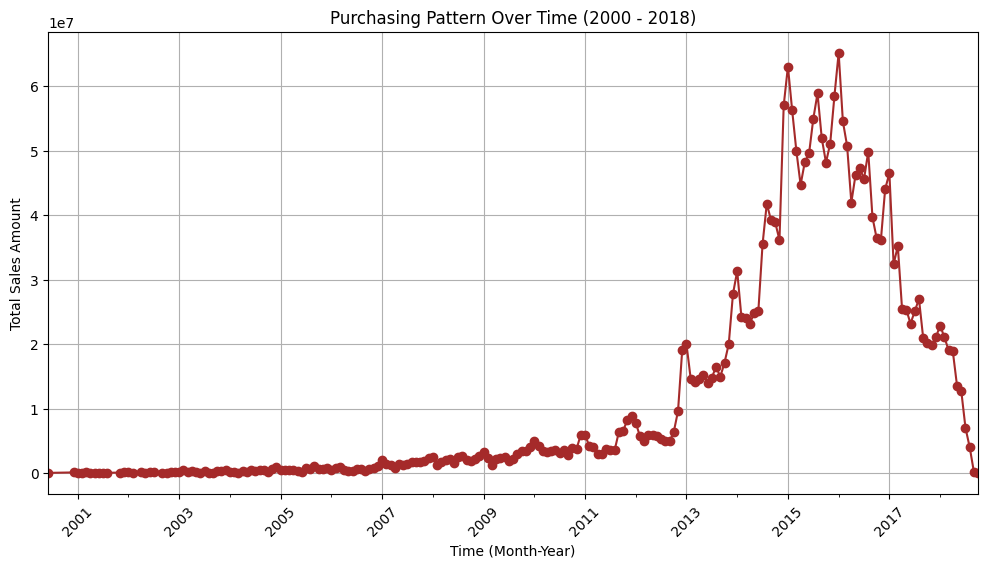

In [22]:
# Convert 'timestamp' column to datetime format
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])

# Create a new column 'month_year' that represents the month and year
dataset['month_year'] = dataset['timestamp'].dt.to_period('M')

# Group by 'month_year' and sum the 'amount' for each period
monthly_sales = dataset.groupby('month_year')['amount'].sum()

# Plot the purchasing pattern over time
plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o', color='brown')
plt.title('Purchasing Pattern Over Time (2000 - 2018)')
plt.xlabel('Time (Month-Year)')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

**Inference:** <Br> 1. The Purchasing power sowly starts increasing after the end of 2012 and then it keeps increasing gradually.
<Br> 2. There are distinct peaks and troughs in sales activity, indicating periods of high and low purchasing activity. This might be due to promotional events, seasonal demands or holidays.
<Br> 3. The purchasing power peaks after the year 2016. This indicates that people were purchasing the most after the year of 2016.

#### Conclusion:

1. 2015 is the best year in terms of sales and profit. <Br>
2. January was the month when most no of orders were made across the product categories and over the years. <Br>
3. The month of February has the highest average monthly sales amount. <Br>
4. Logitech was the brand with the most sales in 2000 to 2018 followed by Bose. <Br>
5. Eincar was the brand with the least sales in 2000 to 2018 followed by Duragadget. <Br>
6. **Top Categories:** Based on sales data from 2000 to 2018, headphones were the most popular category, followed by computers and accessories, and then cameras in terms of total quantity sold. <br>
**Least Categories:**  We can see that the category of Wearable Technology sold the least followed closely by
 Security and Surveillance. <Br>
7. The majority of products received a 5-star rating. <Br>
8. Based on customer ratings, Accessories & Supplies and Television & Video products consistently received the highest levels of satisfaction. <Br>
9. Pleme and Savage were the brands with the highest ratings. <Br>
10. Female are buying the most from Amazon with 68.6% share in the total number of orders made. <Br>
11. The Average order value of Male and Female are almost same. <Br>
12. Headphones sales percentage is the highest followed by Computers & Accessories. <Br>
13. Logitech and Bose sales percentage is highest followed by Sony. <Br>
14. The purchasing power peaks after the year 2016. This indicates that people were purchasing the most after the year of 2016. <Br>